#Penerapan Data Mining dalam Klasifikasi Potensi Gempa Bumi di Pulau Jawa


1. Melakukan analisis terhadap data set yang dimiliki
2.  Membuat Program potensi gempa terhadap suatu daerah dari history gempa yang pernah terjadi khusus di pulau jawa
3. Menguji tingkat akurasi model yang telah dibuat


# Pengambilan Data

[Sumber USGS](https://earthquake.usgs.gov/earthquakes/search/)

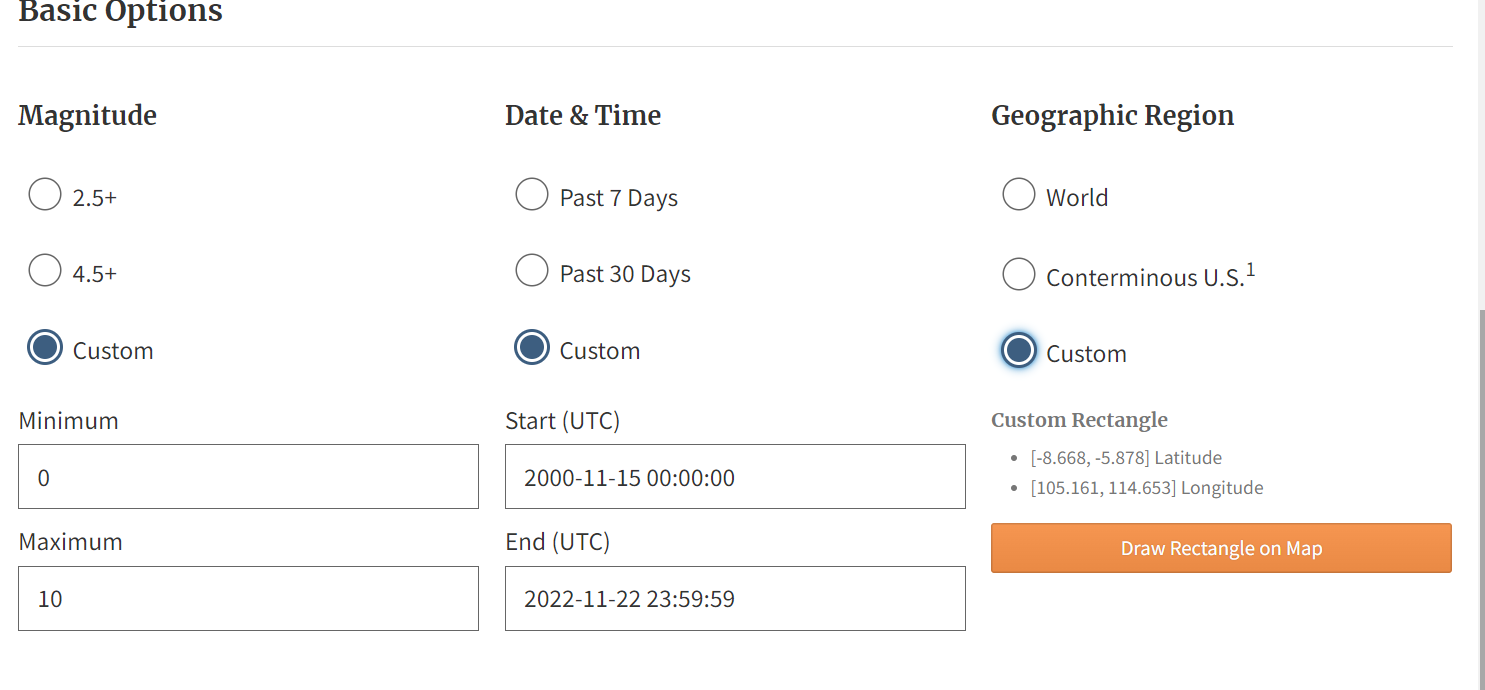

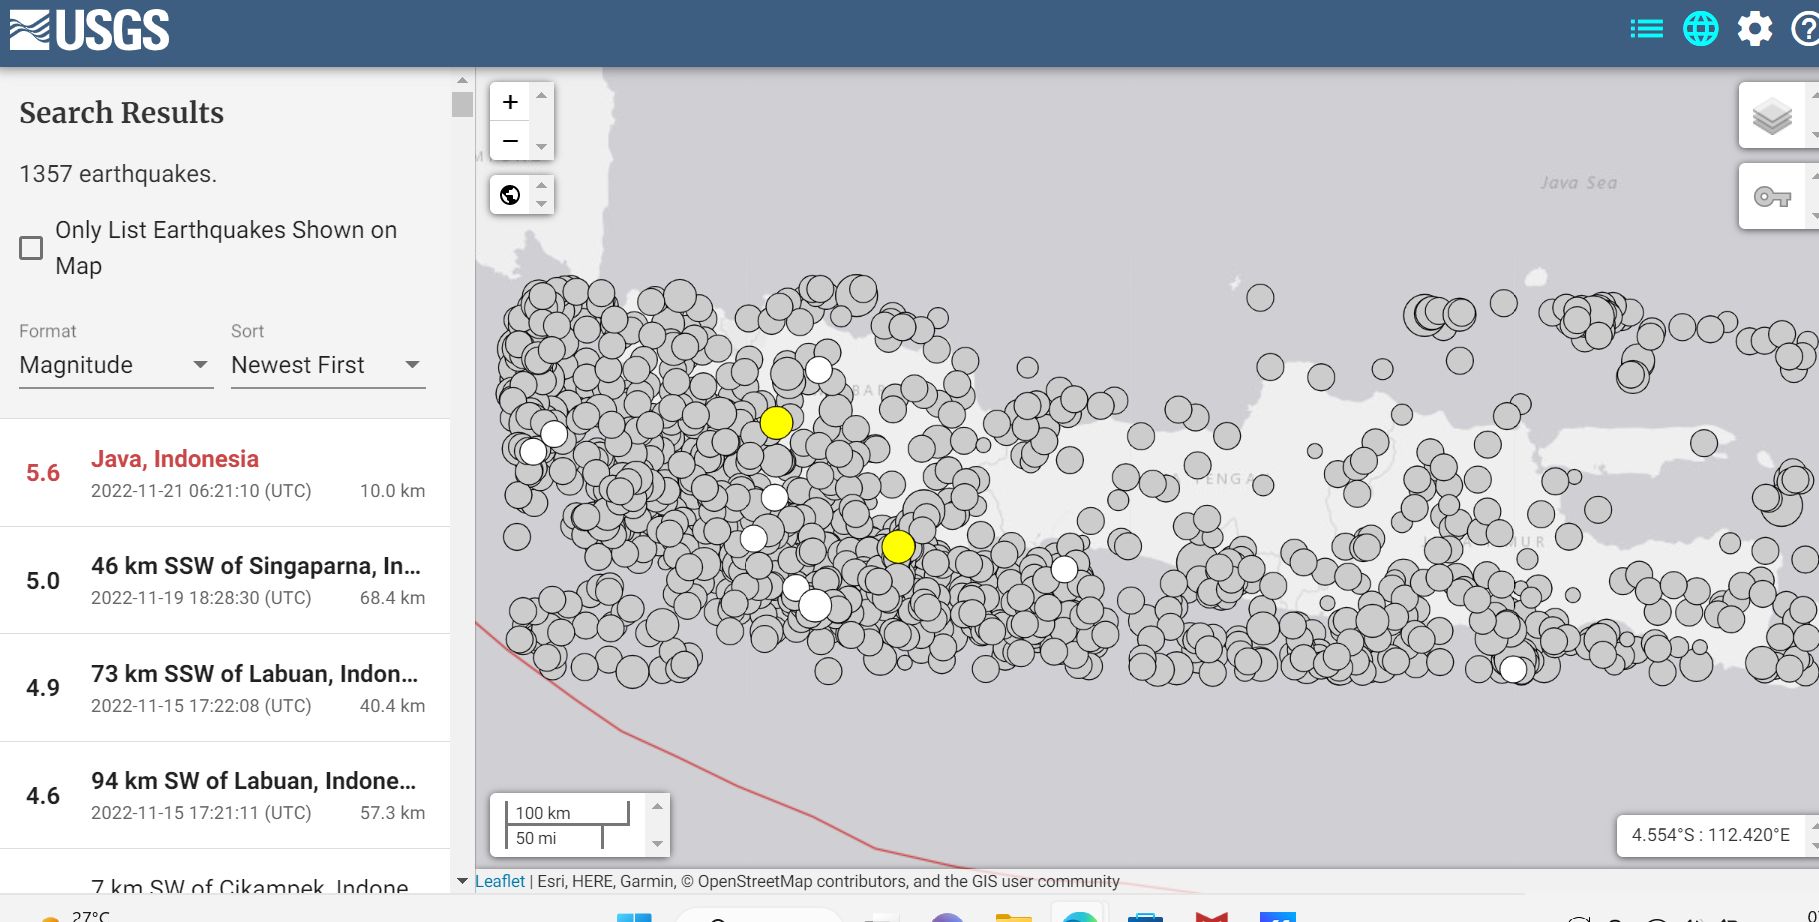

# Mengimport Libary

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mengimport Data

In [54]:
data = pd.read_csv("/content/drive/MyDrive/Project EKSFIS/Update-Data-Gempa (1).csv")
data

,time,longitude,latitude,mag,Dampak
0,2022-11-21T06:21:10.003Z,107.0946,-6.8531,5.6,Dapat menyebabkan kerusakan besar pada banguna...
1,2022-11-19T18:28:30.551Z,108.0179,-7.8043,5.0,Dapat menyebabkan kerusakan besar pada banguna...
2,2022-11-15T17:22:08.199Z,105.4664,-6.9346,4.9,Dapat diketahui dari bergetarnya perabot dalam...
3,2022-11-15T17:21:11.096Z,105.3135,-7.0628,4.6,Dapat diketahui dari bergetarnya perabot dalam...
4,2022-11-13T15:41:12.135Z,107.4048,-6.4684,4.1,Dapat diketahui dari bergetarnya perabot dalam...
...,...,...,...,...,...
1352,2000-12-14T17:01:35.340Z,110.9090,-8.3230,4.8,Dapat diketahui dari bergetarnya perabot dalam...
1353,2000-11-18T20:42:32.330Z,114.0800,-7.7270,3.5,"Biasa terasa, namun jarang menimbulkan kerusakan."
1354,2000-11-18T11:21:47.500Z,105.5680,-6.7540,4.1,Dapat diketahui dari bergetarnya perabot dalam...
1355,2000-11-17T15:06:55.270Z,106.8590,-7.9560,4.6,Dapat diketahui dari bergetarnya perabot dalam...


In [55]:
from sklearn.preprocessing import LabelEncoder
data['Parameter Kekuatan Gempa'] = LabelEncoder().fit_transform(data['Dampak'])
data

,time,longitude,latitude,mag,Dampak,Parameter Kekuatan Gempa
0,2022-11-21T06:21:10.003Z,107.0946,-6.8531,5.6,Dapat menyebabkan kerusakan besar pada banguna...,3
1,2022-11-19T18:28:30.551Z,108.0179,-7.8043,5.0,Dapat menyebabkan kerusakan besar pada banguna...,3
2,2022-11-15T17:22:08.199Z,105.4664,-6.9346,4.9,Dapat diketahui dari bergetarnya perabot dalam...,2
3,2022-11-15T17:21:11.096Z,105.3135,-7.0628,4.6,Dapat diketahui dari bergetarnya perabot dalam...,2
4,2022-11-13T15:41:12.135Z,107.4048,-6.4684,4.1,Dapat diketahui dari bergetarnya perabot dalam...,2
...,...,...,...,...,...,...
1352,2000-12-14T17:01:35.340Z,110.9090,-8.3230,4.8,Dapat diketahui dari bergetarnya perabot dalam...,2
1353,2000-11-18T20:42:32.330Z,114.0800,-7.7270,3.5,"Biasa terasa, namun jarang menimbulkan kerusakan.",1
1354,2000-11-18T11:21:47.500Z,105.5680,-6.7540,4.1,Dapat diketahui dari bergetarnya perabot dalam...,2
1355,2000-11-17T15:06:55.270Z,106.8590,-7.9560,4.6,Dapat diketahui dari bergetarnya perabot dalam...,2


In [56]:

'''Dapat diketahui dari bergetarnya perabot dalam ruangan. = 2
Dapat menyebabkan kerusakan besar pada bangunan di area yang kecil. = 3
ada Gempa kecil, sehingga tidak terasa getarannya. = 0
Mampu menyebabkan kerusakan serius hingga ratusan kilometer.= 5
Mampu membuat kerusakan sampai area sejauh 160 km. = 4
biasa terasa, namun jarang menimbulkan kerusakan. = 1'''

'Dapat diketahui dari bergetarnya perabot dalam ruangan. = 2\nDapat menyebabkan kerusakan besar pada bangunan di area yang kecil. = 3\nada Gempa kecil, sehingga tidak terasa getarannya. = 0\nMampu menyebabkan kerusakan serius hingga ratusan kilometer.= 5\nMampu membuat kerusakan sampai area sejauh 160 km. = 4\nbiasa terasa, namun jarang menimbulkan kerusakan. = 1'

# Prepocessing Data


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      1357 non-null   object 
 1   longitude                 1357 non-null   float64
 2   latitude                  1357 non-null   float64
 3   mag                       1357 non-null   float64
 4   Dampak                    1357 non-null   object 
 5   Parameter Kekuatan Gempa  1357 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 63.7+ KB


In [58]:
data.describe()

,longitude,latitude,mag,Parameter Kekuatan Gempa
count,1357.000000,1357.000000,1357.000000,1357.000000
mean,108.326008,-7.515734,4.415917,2.054532
std,2.520986,0.759580,0.774719,0.523746
min,105.161000,-8.666800,0.000000,0.000000
25%,106.360000,-8.120700,4.200000,2.000000
50%,107.623400,-7.679300,4.400000,2.000000
75%,109.691000,-6.960000,4.700000,2.000000
max,114.648000,-5.878000,7.000000,5.000000


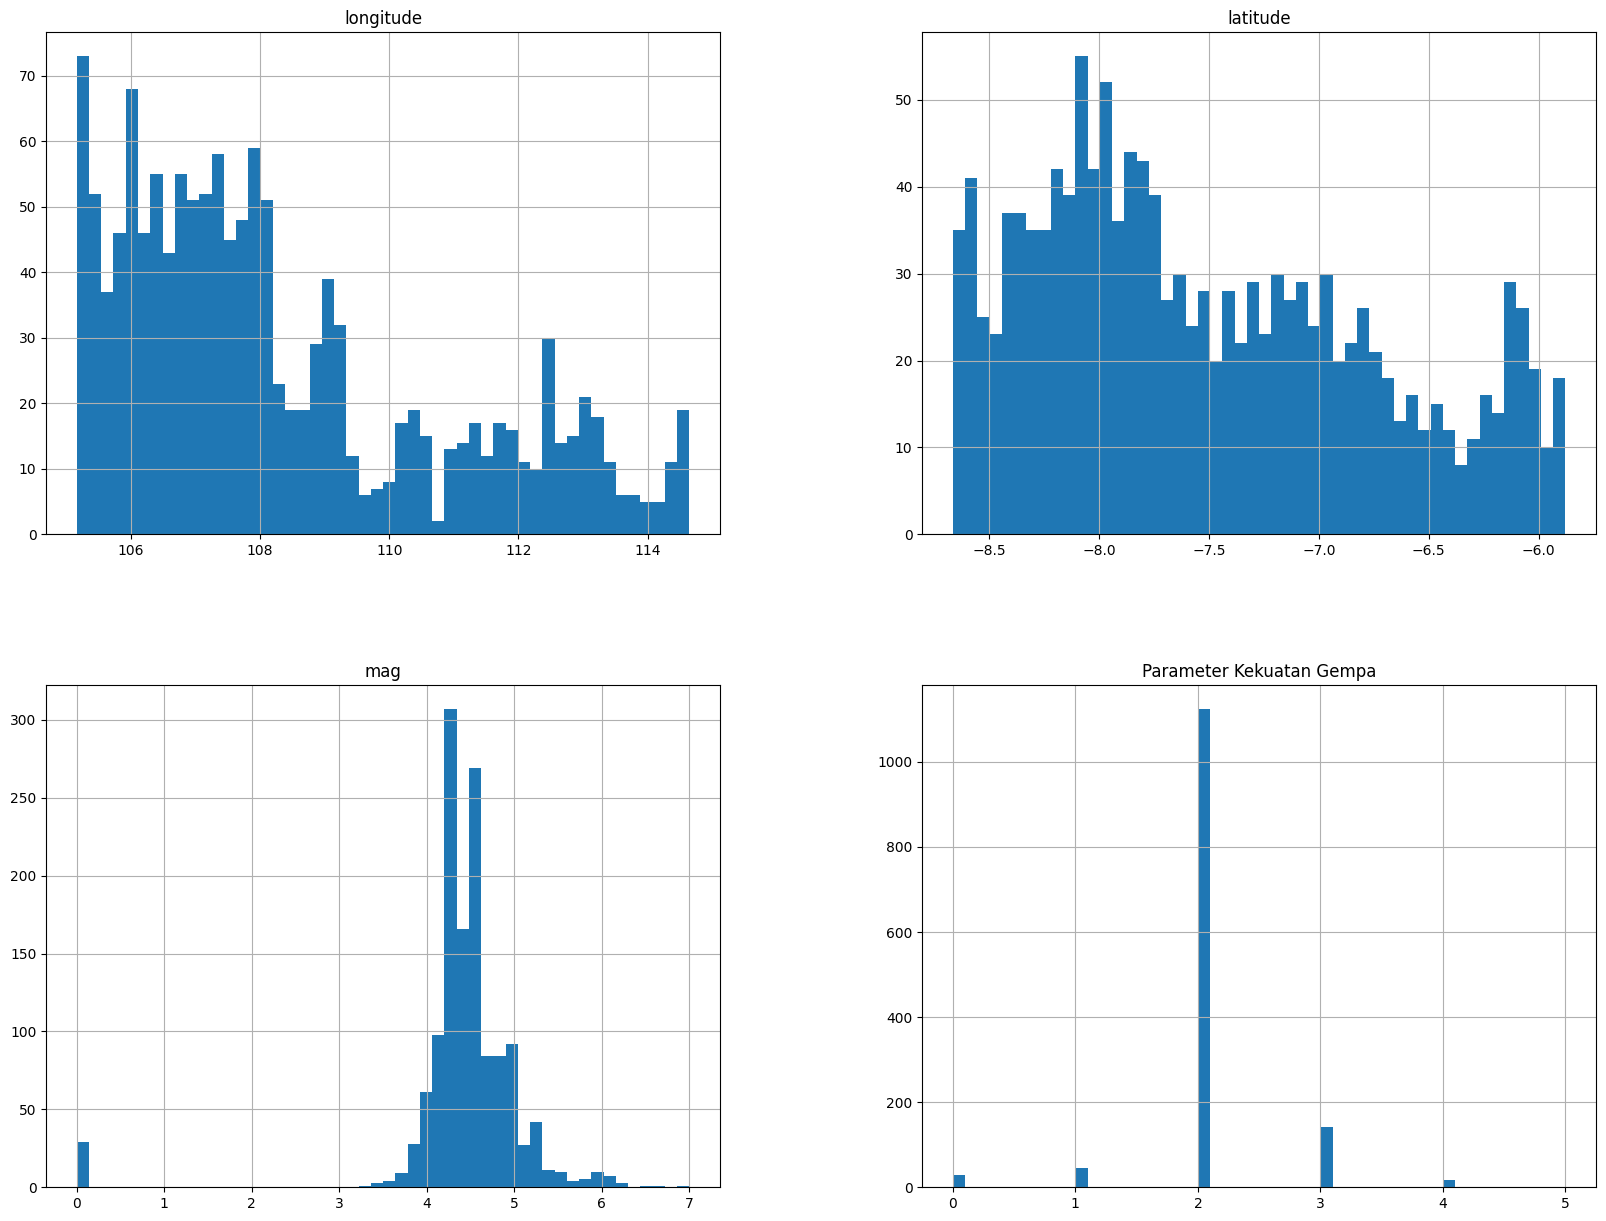

<Figure size 640x480 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()
plt.savefig('Histogram')

<Axes: xlabel='longitude', ylabel='latitude'>

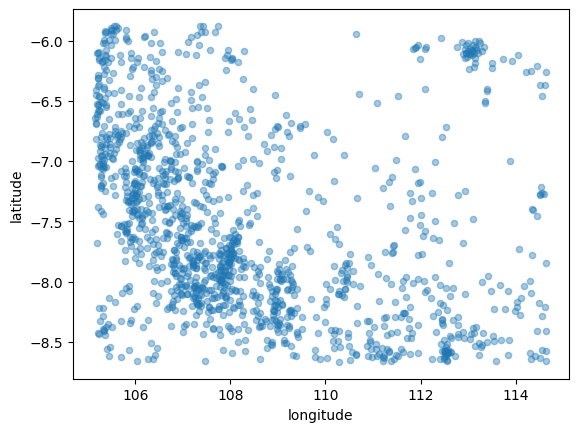

In [60]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4)
#save_fig("bad_visualization_plot")

<Axes: xlabel='longitude', ylabel='latitude'>

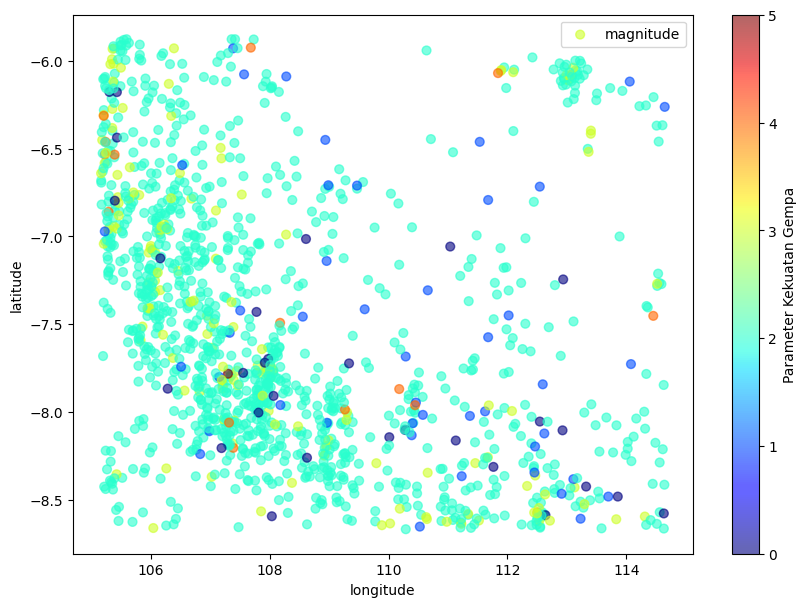

In [61]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.6,
             s=40, label="magnitude", figsize=(10,7),
             c="Parameter Kekuatan Gempa", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

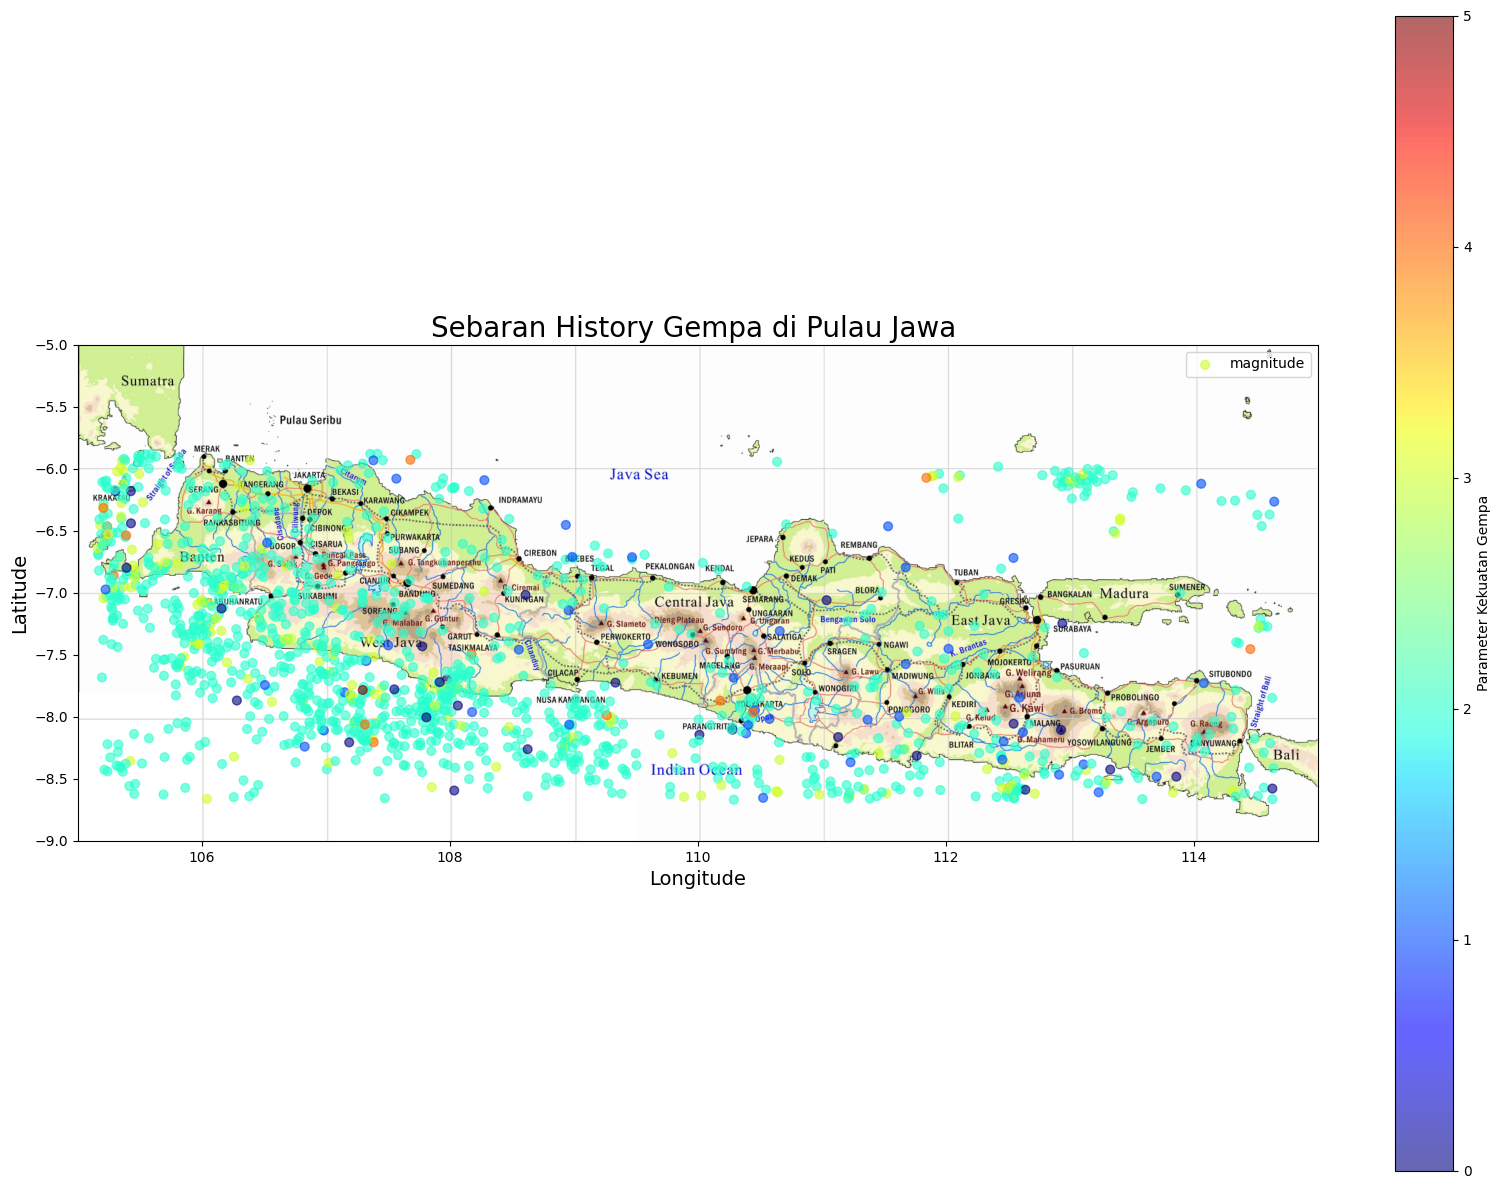

In [62]:
Jawa=mpimg.imread(os.path.join('/content/drive/MyDrive/Project EKSFIS/Desain tanpa judul (6).png'))
ax = data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.6,
             s=40, label="magnitude", figsize=(20,15),
             c="Parameter Kekuatan Gempa", cmap=plt.get_cmap("jet"), colorbar= True)
plt.imshow(Jawa, extent=[105, 115,-9,-5], alpha=1)
           #cmap=plt.get_cmap("jet"))
plt.title('Sebaran History Gempa di Pulau Jawa ', fontsize = 20)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.savefig("Sebaran History Gempa di Pulau Jawa ")
plt.show()

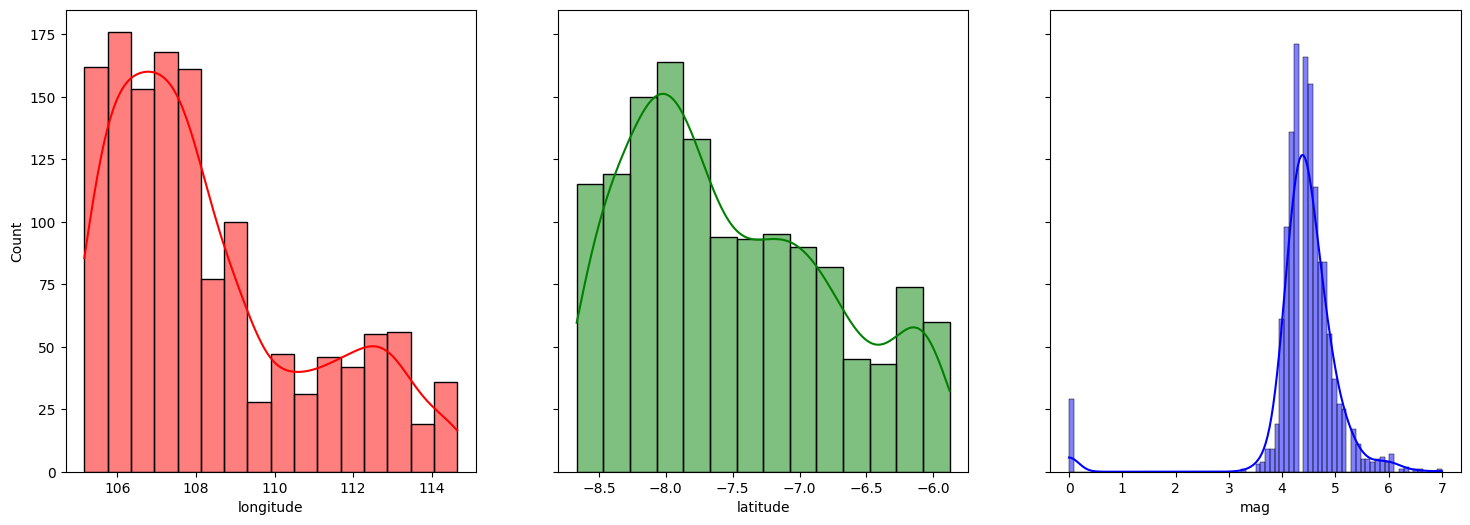

In [63]:
fig, axes = plt.subplots(1,3, figsize=(18,6),sharey=True)
sns.histplot(data, ax = axes[0], x = 'longitude', kde = True, color = 'r')
sns.histplot(data, ax = axes[1], x = 'latitude', kde = True, color = 'g')
sns.histplot(data, ax = axes[2], x = 'mag', kde = True, color = 'b')
plt.savefig("distribusi long, lat dan mag")

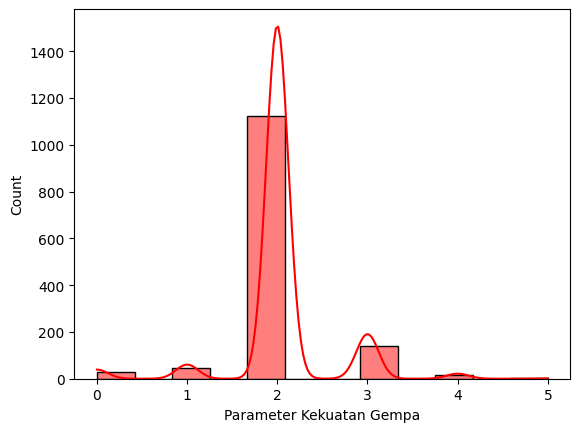

In [64]:
sns.histplot(data,  x = 'Parameter Kekuatan Gempa', kde = True, color = 'r')
plt.savefig("distribusi Parameter Kekuatan Gempa")

# Membuat model random forest

In [65]:
X = data.iloc[:, 1:-3]
y = data.iloc[:, -1]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [67]:
rfc = RandomForestClassifier(n_estimators = 500,  max_depth = 20, min_samples_leaf = 5, min_samples_split = 10, random_state = 42)
rfc.fit(X_train, y_train)
joblib.dump((rfc), "model_random_forest")

['model_random_forest']

In [68]:
accuracy_test_rfc  = rfc.score(X_test, y_test)
print(f"Akurasi Model : {np.round(accuracy_test_rfc * 100,2)} %")

Akurasi Model : 84.15 %


In [69]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        14
           2       0.84      1.00      0.91       377
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00         4

    accuracy                           0.84       448
   macro avg       0.17      0.20      0.18       448
weighted avg       0.71      0.84      0.77       448



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Membuat Model SVC

In [70]:
SVC = svm.SVC(kernel = 'linear', gamma = 'auto', C=3)
SVC.fit(X_train, y_train)
joblib.dump((SVC), "model_SVC")

['model_SVC']

In [71]:
accuracy_test_svc  = SVC.score(X_test, y_test)
print(f"Akurasi Model : {np.round(accuracy_test_svc * 100,2)} %")

Akurasi Model : 84.15 %


In [72]:
y_pred_SVC = SVC.predict(X_test)
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        14
           2       0.84      1.00      0.91       377
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00         4

    accuracy                           0.84       448
   macro avg       0.17      0.20      0.18       448
weighted avg       0.71      0.84      0.77       448



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Membuat Model GaussianNB

In [73]:
Gaussian = GaussianNB()
Gaussian.fit(X_train, y_train)
joblib.dump((rfc), "model_gaussian")

['model_gaussian']

In [74]:
accuracy_test  = Gaussian.score(X_test, y_test)
print(f"Akurasi Model : {np.round(accuracy_test * 100,2)} %")

Akurasi Model : 84.15 %


In [75]:
y_pred_Gaussian = Gaussian.predict(X_test)
print(classification_report(y_test,y_pred_Gaussian))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        14
           2       0.84      1.00      0.91       377
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00         4

    accuracy                           0.84       448
   macro avg       0.17      0.20      0.18       448
weighted avg       0.71      0.84      0.77       448



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Menggunakan Model

In [76]:
df_test = pd.DataFrame(data={
  "Daerah"    : ['DKI Jakarta',"Cianjur",'Kuningan', 'Ngawi', 'Malang'],
  "longitude" : [106.84, 107.0946,110.179, 111.457399, 112.6216],
   "latitude" : [-6.21, -6.8531,-7.869,-7.419073,-8.1218]

})

haspred = df_test.iloc[:, 1:]

In [77]:
pred_test = rfc.predict(haspred)
df_predict = df_test.assign (Parameter_Kekuatan_Gempa = pred_test )
df_predict

,Daerah,longitude,latitude,Parameter_Kekuatan_Gempa
0,DKI Jakarta,106.840000,-6.210000,2
1,Cianjur,107.094600,-6.853100,2
2,Kuningan,110.179000,-7.869000,2
3,Ngawi,111.457399,-7.419073,2
4,Malang,112.621600,-8.121800,2


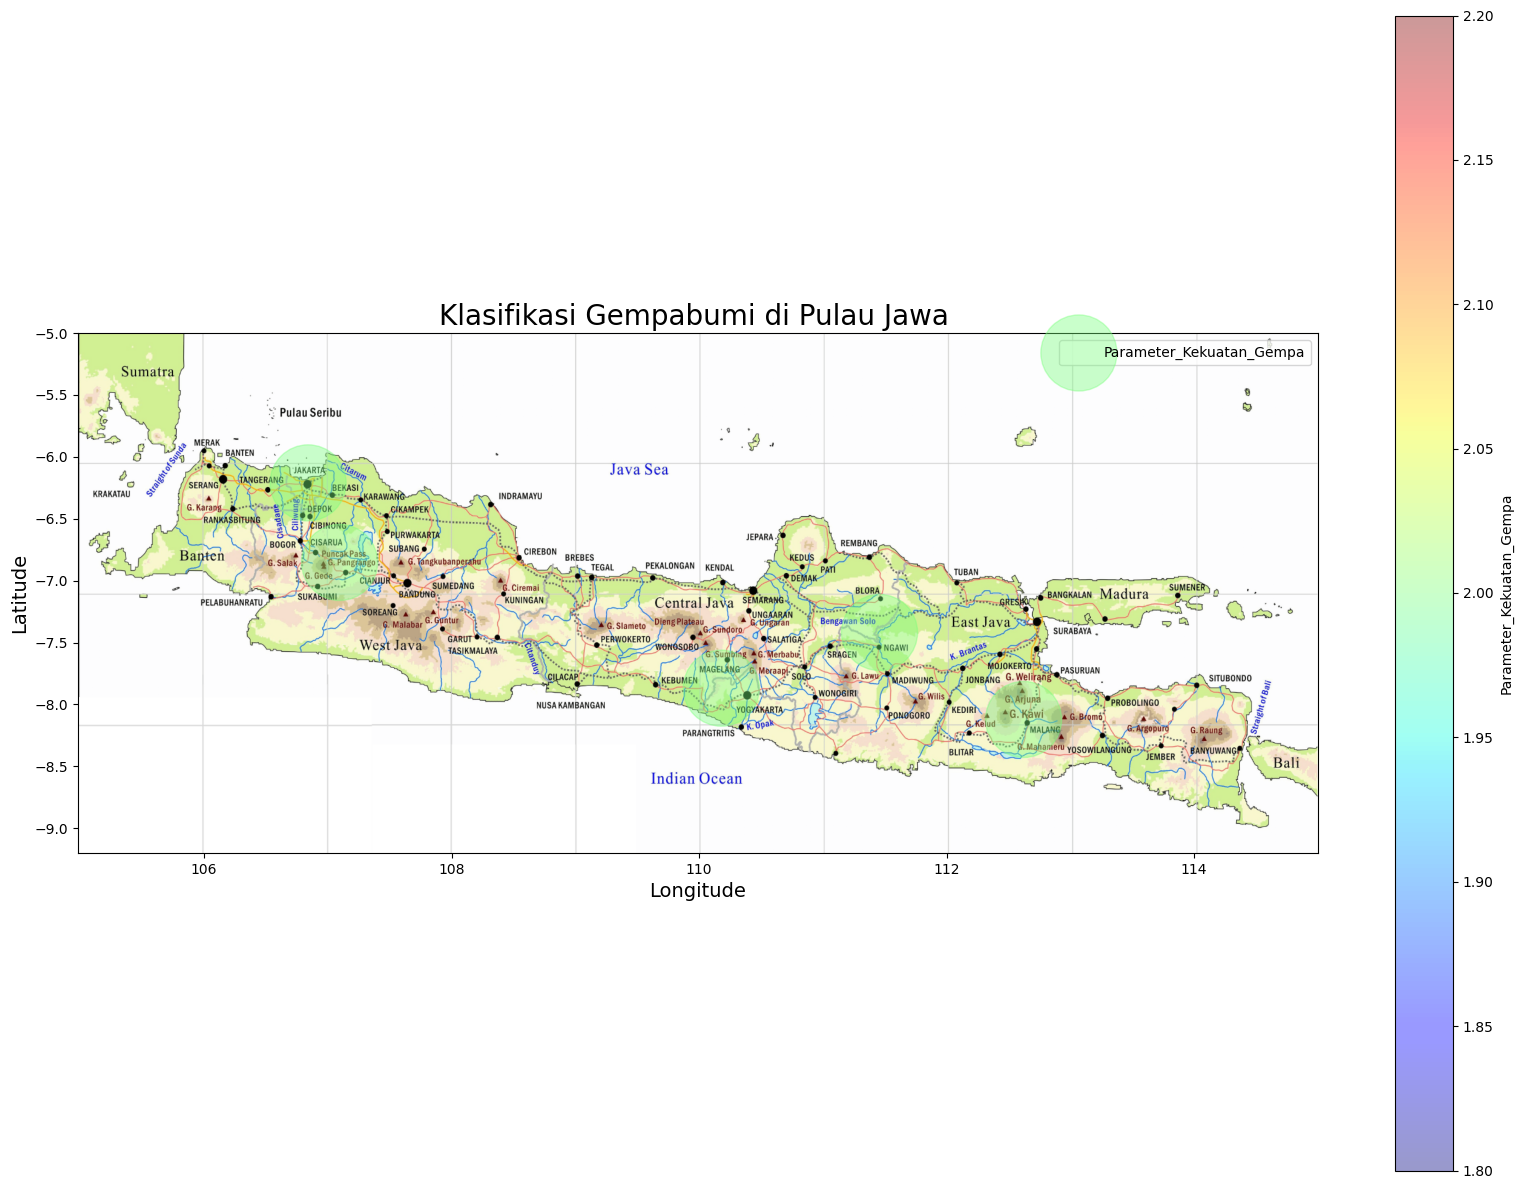

In [78]:
Jawa=mpimg.imread(os.path.join('/content/drive/MyDrive/Project EKSFIS/Desain tanpa judul (6).png'))
ax = df_predict.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c="Parameter_Kekuatan_Gempa",
             s=df_predict["Parameter_Kekuatan_Gempa"]*1500, label="Parameter_Kekuatan_Gempa", figsize=(20,15),
              cmap=plt.get_cmap("jet"), colorbar= True)
plt.imshow(Jawa, extent=[104.98, 115,-9.2,-5], alpha=1)
           #cmap=plt.get_cmap("jet"))
plt.title('Klasifikasi Gempabumi di Pulau Jawa ', fontsize = 20)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.savefig("Klasifikasi Gempabumi di Pulau Jawa ")
plt.show()

#Kesimpulan

Penelitian ini menggunakan data set gempabumi  sejak tahun 2000 – 2022 yang berasal dari USGS, kemudian dilakukan pemodelan dengan machine learning yaitu model random forest classifier, SVC dan Gaussian NB untuk melakukan klasifikasi terhadap potensi gempa bumi di pulau jawa berdasarkan historis dari gempa. Berdasarkan hasil percobaan model yang dilakukan semua model mendapatkan nilai akurasi 84,15% hal tersebut terjadi karena data set yang digunakan didominasi pada kategori 3 sehingga model cenderum mampu mengklasifikasikan gempabumi dengan kategori 3. Namun setelah model digunakan model dapat berkerja dengan baik. Hal tersebut di buktikan dengan hasil prediksi yang mengatakan bahwa Jawa Barat memiliki potensi gempa yang tinggi. Hal tersebut sesuai dengan pernyataan yang dikeluarkan oleh PVMBG yang menyebutkan bahwa Wilayah Jawa bagian Barat merupakan wilayah/zona VII pada Peta Wilayah Rawan Gempabumi Indonesia (yang dikeluarkan oleh PVMBG, Pusat Vulkanologi dan Mitigasi Bencana Geologi tahun 2006).